# Aim: Implement Logistic Regression on Iris dataset and evaluate its performance.

# SKLearn
## 25/7/24

# Logistic Regression

## Iris

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('Iris.csv')

In [38]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
df = df.drop(columns = ['Id'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [52]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [53]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Preprocessing

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [55]:
print(df.head())
print(df.tail())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2


<AxesSubplot:>

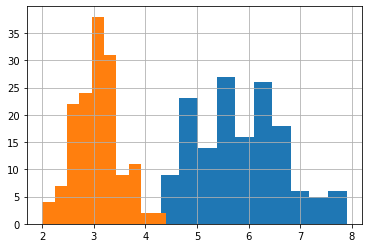

In [56]:
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()

<AxesSubplot:>

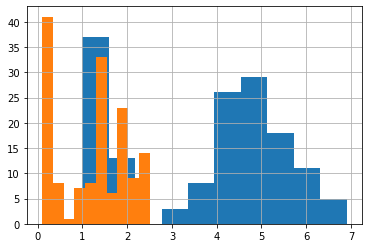

In [57]:
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

In [60]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['Species'])
y = df['Species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [62]:
model.fit(x_train,y_train)

LogisticRegression()

In [72]:
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [73]:
print("Accuracy: ", model.score(x_train, y_train) * 100)

Accuracy:  98.09523809523809


In [65]:
y_pred = model.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test,y_pred)
cm3

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<AxesSubplot:>

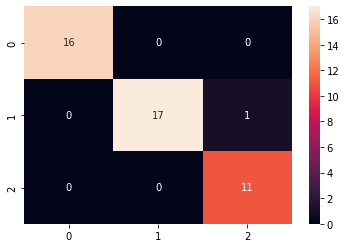

In [74]:
sns.heatmap(cm3,annot = True)

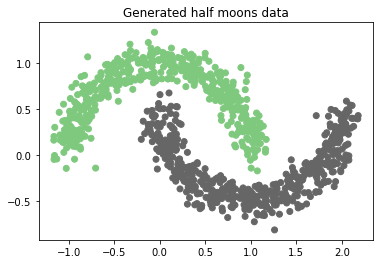

In [79]:
from sklearn import datasets

n_samples = 1000  # number of samples to generate
noise = 0.1  # noise to add to sample locations
x, y = datasets.make_moons(n_samples=n_samples, noise=noise)

plt.scatter(*x.T, c=y, cmap=plt.cm.Accent)
plt.title("Generated half moons data");

In [ ]:
os.